In [1]:
import pandas as pd
import csv
import datetime
from dateutil.parser import parse
import os
import numpy as np
!pwd

/Users/sbhasin/Desktop/PandemicChallenge


data only available for the following countries - 
'AFG', 'ARG', 'AUS', 'BGD', 'BEL', 'BRA', 'CAN', 'DNK', 'EGY', 'FRA','GHA','HKG','IND', 'IRL', 'ISR', 'ITA', 'JPN', 'KGZ', 'LTU','MEX', 'NAM','NZL', 'NGA', 'OMN', 'PER', 'PRI', 'QAT', 'SAU', 'ZAF', 'KOR', 'THA', 'GBR', 'USA','ZMB'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
output_df = pd.read_csv(os.path.join('data', 'confirmed_cases.csv'))
count = 0
headers = []
old = 45
new = 28
output_date = datetime.date(2020, 10, 1)
cc = []
for header in output_df:
    headers.append(header)
for i in range(3,len(headers)):
    #print(type(headers[i]))
    dt = parse(headers[i])
    headers[i] = dt.strftime('%Y-%m-%d')
    #print(headers[i])
output_df.columns = headers
for country in output_df['country_name']:
    if country == "Mexico":
        break
    count +=1 
current_dates = []
for row in range(old):
    new_date = output_date - datetime.timedelta(row)
    current_dates.append(new_date)
for date in range(old):
    prev_date = current_dates[date] - datetime.timedelta(1)
    cc.append(output_df.loc[count, str(current_dates[date])])

cc.reverse()
print(cc)

[531239.0, 537031.0, 543806.0, 549734.0, 556216.0, 560164.0, 563705.0, 568621.0, 573888.0, 579914.0, 585738.0, 591712.0, 595841.0, 599560.0, 606036.0, 610957.0, 616894.0, 623090.0, 629409.0, 634023.0, 637509.0, 642860.0, 647321.0, 652364.0, 658299.0, 663973.0, 668381.0, 671716.0, 676487.0, 680931.0, 684113.0, 688954.0, 694121.0, 697663.0, 700580.0, 705263.0, 710049.0, 715457.0, 720858.0, 726431.0, 730317.0, 733717.0, 738163.0, 743216.0, 748315.0]


In [164]:
tm=list(range(0, len(cc)))
#print(tm)

m=max(tm)+1
#print(m)
nums=tm
nums2=list(range(m, m+new))

nums.extend(nums2)
x_predict=nums
# print(x_predict)

a1=np.array(nums)
# print(a1)

emp=np.zeros(shape=(m,5))
numofRows=emp.shape[0]
numofCols=emp.shape[1]

for i in range(0,numofRows):
    emp[i][0]=a1[i]*a1[i]*a1[i]*a1[i]
    emp[i][1]=a1[i]*a1[i]*a1[i]
    emp[i][2]=a1[i]*a1[i]
    emp[i][3]=a1[i]
    emp[i][4]=1


W=np.zeros(shape=(m,m))  
l1=numofRows-7
l2=numofRows-14
l3=numofRows-21
l4=numofRows-28

# l1=numofRows-2
# l2=numofRows-4
# l3=numofRows-3
# l4=numofRows-4
for i in range(0,numofRows):  
    if l1<i and numofRows:
        W[i][i]=1
    elif l2<i and i<l1:
        W[i][i]=0.9
    elif l3<i and i<l2:
        W[i][i]=0.8
    elif l4<i and i<l3:
        W[i][i]=0.5
    else:      
        W[i][i]=0.1


active_case_ar = np.array(cc)        

w1=emp.transpose()@W@emp

w2=emp.transpose()@W@active_case_ar  
w3=np.linalg.inv(w1)  
beta=w3@w2  

beta_11= beta[3];


active_case_predict= [beta[0] * x_predict**4 +beta[1] * x_predict**3  + beta[2] *x_predict**2+beta[3]*x_predict +beta[4] for x_predict in x_predict]

# to obtain list only till the maximum value 
active_case_cutoff = []
for i in active_case_predict:
    if i == max(active_case_predict):
        active_case_cutoff.append(i)
        break
    else:
        active_case_cutoff.append(i)

index_date = output_date + datetime.timedelta(len(active_case_cutoff) - old)
print(index_date)



2020-10-29


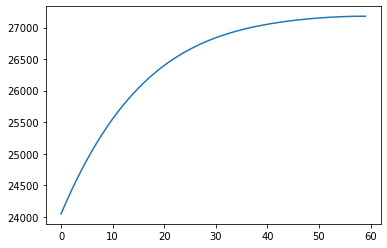

In [91]:
from matplotlib import pyplot as plt
plt.plot(active_case_cutoff)
#plt.plot(cc)

In [212]:
def create_dataframe (lookback_days, total_rows, input_date, static_df, dyn_df, output_df, temp_df, reg):
    final_df = pd.DataFrame()
    time = lookback_days
    output_date = input_date
    rows = total_rows
    fields_npi = []
    filenames = ["c1_school_closing.csv", "c2_workplace_closing.csv", "c3_cancel_public_events.csv",
            "c4_restrictions_on_gatherings.csv", "c5_close_public_transport.csv", "c6_stay_at_home_requirements.csv", "c7_movementrestrictions.csv",
            "c8_internationaltravel.csv", "h1_public_information_campaigns.csv","h2_testing_policy.csv","h3_contact_tracing.csv", "h6_facial_coverings.csv"]

    for i in filenames:
        fields_npi.append(i[:-4])
        
    count_npis = 0
    for npi_file in filenames:
        India = 0
        count_npis += 1 
        npi_df = pd.read_csv(os.path.join('timeseries', npi_file))
        # first we need to convert the header date formats to more y -m - d format
        headers = []
        for header in npi_df:
            headers.append(header)
        for i in range(3,len(headers)):
            dt = parse(headers[i])
            headers[i] = dt.strftime('%Y-%m-%d')
        npi_df.columns = headers
        for region in npi_df['country_code']:
            if region == reg:
                break           
            India += 1 

        for column in range(1, 1+time):
            new  = pd.Series([], dtype = 'float64')
            current_date = output_date - datetime.timedelta(column)
            for row in range(rows):
                new_date = current_date - datetime.timedelta(row)
                new[row] = npi_df.loc[India, str(new_date)]          

            final_df.insert(time*(count_npis-1)+column-1, fields_npi[count_npis-1][:-4] + str(column), new)

    index = pd.Series([], dtype = 'float64')
    current_dates = []
    for row in range(rows):
        new_date = output_date - datetime.timedelta(row)
        index[row] = new_date
        current_dates.append(new_date)
    final_df.insert(0, 'current_date', index)
    
    dyn_df1 = dyn_df[dyn_df['Code']==reg]
    dyn_df1 = dyn_df.set_index('Date', drop = True)
    #print(dyn_df1)
    for header in dyn_df1:
        if header == 'Date' or header == "Unnamed: 0" or header == 'Code':
            continue 
        for column in range(1, 1+time):
          new_1  = pd.Series([], dtype = 'float64')
          current_date = output_date - datetime.timedelta(column)
          for row in range(rows):
                new_date = current_date - datetime.timedelta(row)
                new_1[row] = dyn_df1.loc[str(new_date), header][1] 
                print(new_1[row])         

          final_df.insert(final_df.shape[1], header + str(column), new_1)




    static_df = static_df[static_df['iso_code']== reg]

    fields = ['population_density' ,'median_age', 'human_development_index']
    for i in range(3):
        #if i!=2:
            #copy = copy.drop(fields[i])
        new  = pd.Series([], dtype = 'float64')
        for j in range(rows):
            new[j] = static_df.iloc[0][i+2]

        final_df.insert(final_df.shape[1], fields[i], new)



    count_cc = 0
    headers_cc = []
    for header in output_df:
        headers_cc.append(header)
    for i in range(3,len(headers)):
        dt = parse(headers[i])
        headers_cc[i] = dt.strftime('%Y-%m-%d')
    output_df.columns = headers
    for region_cc in output_df['country_code']:
        if region_cc == reg:
            break
        count_cc +=1 
    outputs  = pd.Series([], dtype = 'float64')
    for date in range(len(current_dates)):
        prev_date = current_dates[date] - datetime.timedelta(1)
        outputs[date] = (output_df.loc[count_cc, str(current_dates[date])] - output_df.loc[count_cc, str(prev_date)])*100/output_df.loc[count_cc, str(prev_date)]

    final_df.insert(final_df.shape[1],'output', outputs)

    month_mapper = {}
    count_temp = 0
    India = 0
    for header in temp_df:
        month_mapper[count_temp] = header
        count_temp+=1 

    for country in temp_df['ISO_3DIGIT']:
        if country == reg:
            break
        India +=1 
    prev_date = output_date
    for week in range(1,9):
        #copy.drop(columns = ['temp_week_{}'.format(str(week))])
        prev_date = prev_date - datetime.timedelta(7)
        month = int(str(prev_date)[5:-3])
        #print(month_mapper[month])
        new = pd.Series([], dtype = 'float64')
        column = month_mapper[month]
        temperature = temp_df.loc[India, column]
        for row in range(rows):
            new[row] = temperature
        final_df.insert(final_df.shape[1]-1,'temp_week_{}'.format(str(week)), new)
    demography = pd.Series([reg for i in range(total_rows)])
    #final_df.insert(final_df.shape[1], 'demography', demography )
    final_df.to_csv(os.path.join('data', 'final.csv'))      
    return final_df

In [ ]:
lookback_days = 10
total_rows = 10
input_date = datetime.date(2020, 11, 30)
dyn_df = pd.read_csv('data/dynamic.csv')
static_df = pd.read_csv('data/static.csv')
output_df = pd.read_csv('data/confirmed_cases.csv')
temp_df = pd.read_csv('data/temperatures.csv')
#countries = [temp_df.iloc[i]['ISO_3DIGIT'] for i in range(len(temp_df))]
#initial = countries.pop(0)
#print(countries, initial)
#df_usa = create_dataframe (lookback_days, total_rows, input_date, static_df, dyn_df, output_df, temp_df,
                       #'USA')
df_aus = create_dataframe (lookback_days, total_rows, input_date, static_df, dyn_df, output_df, temp_df,
                       'AUS')
#df_test = create_dataframe (lookback_days, total_rows, input_date, static_df, dyn_df, output_df, temp_df,
                       #'IND')
#df = pd.concat([df_usa, df_india])
#df.reset_index(drop = True)


In [214]:
df_aus

,current_date,c1_school_clo1,c1_school_clo2,c1_school_clo3,c1_school_clo4,c1_school_clo5,c1_school_clo6,c1_school_clo7,c1_school_clo8,c1_school_clo9,c1_school_clo10,c2_workplace_clo1,c2_workplace_clo2,c2_workplace_clo3,c2_workplace_clo4,c2_workplace_clo5,c2_workplace_clo6,c2_workplace_clo7,c2_workplace_clo8,c2_workplace_clo9,c2_workplace_clo10,c3_cancel_public_ev1,c3_cancel_public_ev2,c3_cancel_public_ev3,c3_cancel_public_ev4,c3_cancel_public_ev5,c3_cancel_public_ev6,c3_cancel_public_ev7,c3_cancel_public_ev8,c3_cancel_public_ev9,c3_cancel_public_ev10,c4_restrictions_on_gather1,c4_restrictions_on_gather2,c4_restrictions_on_gather3,c4_restrictions_on_gather4,c4_restrictions_on_gather5,c4_restrictions_on_gather6,c4_restrictions_on_gather7,c4_restrictions_on_gather8,c4_restrictions_on_gather9,...,Mobility_transit_stations4,Mobility_transit_stations5,Mobility_transit_stations6,Mobility_transit_stations7,Mobility_transit_stations8,Mobility_transit_stations9,Mobility_transit_stations10,Mobility_residential1,Mobility_residential2,Mobility_residential3,Mobility_residential4,Mobility_residential5,Mobility_residential6,Mobility_residential7,Mobility_residential8,Mobility_residential9,Mobility_residential10,Mobility_workplaces1,Mobility_workplaces2,Mobility_workplaces3,Mobility_workplaces4,Mobility_workplaces5,Mobility_workplaces6,Mobility_workplaces7,Mobility_workplaces8,Mobility_workplaces9,Mobility_workplaces10,population_density,median_age,human_development_index,temp_week_1,temp_week_2,temp_week_3,temp_week_4,temp_week_5,temp_week_6,temp_week_7,temp_week_8,output,demography
0,2020-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,...,-39.286,-39.286,-39.000,-38.857,-36.143,-36.571,-37.429,11.286,10.857,10.429,10.571,10.571,10.429,10.429,9.857,10.143,10.571,-17.714,-17.857,-17.714,-17.857,-17.857,-17.857,-18.000,-12.286,-12.286,-12.857,3.202,37.9,0.939,25.13,25.13,25.13,25.13,22.46,22.46,22.46,22.46,0.035840,AUS
1,2020-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,...,-39.286,-39.000,-38.857,-36.143,-36.571,-37.429,-37.714,10.857,10.429,10.571,10.571,10.429,10.429,9.857,10.143,10.571,10.571,-17.857,-17.714,-17.857,-17.857,-17.857,-18.000,-12.286,-12.286,-12.857,-13.143,3.202,37.9,0.939,25.13,25.13,25.13,25.13,22.46,22.46,22.46,22.46,0.035853,AUS
2,2020-11-28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,...,-39.000,-38.857,-36.143,-36.571,-37.429,-37.714,-37.857,10.429,10.571,10.571,10.429,10.429,9.857,10.143,10.571,10.571,10.571,-17.714,-17.857,-17.857,-17.857,-18.000,-12.286,-12.286,-12.857,-13.143,-13.286,3.202,37.9,0.939,25.13,25.13,25.13,25.13,22.46,22.46,22.46,22.46,0.021516,AUS
3,2020-11-27,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,-38.857,-36.143,-36.571,-37.429,-37.714,-37.857,-37.714,10.571,10.571,10.429,10.429,9.857,10.143,10.571,10.571,10.571,10.571,-17.857,-17.857,-17.857,-18.000,-12.286,-12.286,-12.857,-13.143,-13.286,-13.429,3.202,37.9,0.939,25.13,25.13,25.13,25.13,22.46,22.46,22.46,22.46,0.046640,AUS
4,2020-11-26,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,...,-36.143,-36.571,-37.429,-37.714,-37.857,-37.714,-37.429,10.571,10.429,10.429,9.857,10.143,10.571,10.571,10.571,10.571,10.571,-17.857,-17.857,-18.000,-12.286,-12.286,-12.857,-13.143,-13.286,-13.429,-13.429,3.202,37.9,0.939,25.13,25.13,25.13,25.13,22.46,22.46,22.46,22.46,0.028710,AUS
5,2020-11-25,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

In [185]:
for i in dyn_df:
  print(i)

Unnamed: 0
Code
Mobility_grocery_and_pharmacy
Mobility_parks
Mobility_transit_stations
Mobility_residential
Mobility_workplaces


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.models import model_from_json
import keras

df_np = df.to_numpy()
x = df_np[:,2:-2]
y = df_np[:,-1]

x = tf.convert_to_tensor(np.asarray(x, dtype=np.float64))
y = tf.convert_to_tensor(np.asarray(y, dtype=np.float64))


opt = keras.optimizers.Adam(learning_rate=1e-4)

NN_model = Sequential()
# The Input Layer:
NN_model.add(Dense(512, kernel_initializer='normal',input_dim =729, activation='relu'))
print('check1')
# The Hidden Layers:
# NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='softplus'))
print('check2')
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
NN_model.summary()
print('check3')
history = NN_model.fit(x,y,epochs = 1000, verbose=1)
NN_model.save("model.h5")
print('check4')
# NN_model.load_weights('model.h5')
#y_pred = NN_model.predict()

##print(y)
#print(y_pred)




In [ ]:
input_date = datetime.date(2020, 10, 26)
lookback_days = 60
total_rows = 10
df_test = create_dataframe (lookback_days, total_rows, input_date, static_df, dyn_df, output_df, temp_df,
                       'MEX')

In [167]:
df_np = df_test.to_numpy()
x_test = df_np[:,2:-2]
y_test = df_np[:,-1]

x_test = tf.convert_to_tensor(np.asarray(x_test, dtype=np.float64))
y_test = tf.convert_to_tensor(np.asarray(y_test, dtype=np.float64))


In [168]:
y_pred = NN_model.predict(x_test)
y_pred_reverse = y_pred[::-1,:]
y_pred = y_pred_reverse
growthrate = y_pred[:,0]/100
#print(growthrate)
active_case_cutoff
print(growthrate)

[0.00084181 0.00089024 0.00088862 0.00087422 0.00087257 0.00089702
 0.00092211 0.00088535 0.00087381 0.00089202]


In [ ]:
gw_1= (active_case_cutoff[-1] - active_case_cutoff[-2])/(active_case_cutoff[-2])
gw_2= (active_case_cutoff[-2] - active_case_cutoff[-3])/(active_case_cutoff[-3])
gw_3= (active_case_cutoff[-3] - active_case_cutoff[-4])/(active_case_cutoff[-4])
print(gw_1, gw_2, gw_3)
y1 = active_case_cutoff[-1]
avg_gw=(gw_1 +gw_2 +gw_3)/2

#print(avg_gw)

#   consider a   factor alpha   to match  the growth rate  with  that value ... if  not  trained ...

size=len(growthrate)
growthrate = growthrate.tolist()
# low-pass filter applied here 
growthrate.insert(0, avg_gw)
for i in range(len(growthrate)-1):
  growthrate[i+1] = 0.8*growthrate[i] + 0.2*growthrate[i+1]

growthrate = growthrate[1:]
#print(growthrate_array)
# for scaling 
growthrate_array=np.array(growthrate)
#firstval= growthrate_array[0]

#scale_fac= avg_gw/firstval

# scale_fac= gw_1/firstval  

#growthrate_array= scale_fac*growthrate_array

# use  filter   version of growth rate array  (0.8 * old+ 0.2*new)

#print(growthrate_array)

y_ml_predict=[]
y_ml_predict=[0 for i in range(size)]
y_ml_predict[0]=y1 ;

#print(size)

for i  in range(1, size):
    y_ml_predict[i]= y_ml_predict[i-1]+ growthrate[i-1]*y_ml_predict[i-1]
 
#print(y_ml_predict)  

y_ml_predict_init=y_ml_predict.pop(0)

#print(y_ml_predict)


y_predict= active_case_cutoff + y_ml_predict

print(len(y_predict))

In [ ]:
plt.plot(y_predict)

In [ ]:
print(growthrate)
print(gw_1, gw_2, gw_3)

In [ ]:
print(active_case_cutoff)

In [ ]:
print(y_predict)

In [215]:
while True:
  continue

KeyboardInterrupt: ignored